In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
sns.set(style="whitegrid",palette='muted',color_codes=True)

In [7]:
df1=pd.read_csv("/content/Product_animals.csv")

In [8]:
df1.head()

,State/Union Territory,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,...,2016-17,2017-18,2018-19,2019-20,Total Production,cattle,buffalo,sheep,goat,Total Animals
0,Andaman and Nicobar Islands,24,20,23,24,26,24,25,26,21,...,16,17,18,19,328,36438,3700,5,64761,104904
1,Andhra Pradesh#,7257,7624,7938,8925,9570,10429,11203,12088,12762,...,12178,13725,15044,15263,177486,4600087,6219499,17626971,5522133,33968690
2,Arunachal Pradesh,48,48,49,32,24,26,28,22,23,...,53,54,55,61,662,339221,6379,7345,159740,512685
3,Assam,739,747,750,752,753,756,790,796,800,...,861,872,882,920,12905,10909239,421715,332100,4315173,15978227
4,Bihar,4743,5060,5451,5783,5934,6124,6517,6643,6845,...,8711,9242,9818,10480,114611,15397980,7719794,213377,12821216,36152367


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = (df1['Total Animals']).to_numpy()
y = (df1['Total Production']).to_numpy()

In [11]:
from sklearn.preprocessing import MinMaxScaler
s= MinMaxScaler(feature_range=(0,1))

In [12]:
x_new =s.fit_transform(x.reshape(-1,1))
y_new=s.fit_transform(y.reshape(-1,1))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_new,y_new, test_size=0.33, random_state=42)

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor()

In [15]:
reg.fit(X_train,y_train)

<ipython-input-15-76dcf3f49433>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train,y_train)


ExtraTreesRegressor()

In [16]:
from sklearn.tree import DecisionTreeRegressor

In [17]:
reg_model = DecisionTreeRegressor()

In [18]:
reg_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [19]:
reg_model.score(X_train,y_train)

1.0

In [20]:
prediction = reg_model.predict(X_test)

In [21]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
tuning_model=GridSearchCV(reg_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [24]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [37]:
from datetime import datetime

start_time=timer(None)

tuning_model.fit(x.reshape(x.shape[0],1),y.reshape(y.shape[0],1))

timer(start_time)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-1263494383.351 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-15634365132.573 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-4941750218.685 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-3818616485.520 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-11140413274.121 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_sa

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
67200 fits failed out of a total of 151200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
67200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 1315, in fit
    super().fit(
  File "/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py", line 304, in fit
    raise ValueError("min_weight_fraction_leaf must in [0, 0.5]")
ValueError: min_weight_fraction_leaf must 

In [38]:
tuning_model.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

In [26]:
tuned_hyper_model= DecisionTreeRegressor(max_depth= 3,
 max_features= 'log2',
 max_leaf_nodes= 70,
 min_samples_leaf= 3,
 min_weight_fraction_leaf= 0.1,
 splitter= 'random')

In [27]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, max_features='log2', max_leaf_nodes=70,
                      min_samples_leaf=3, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [28]:
tuned_pred=tuned_hyper_model.predict(X_test)

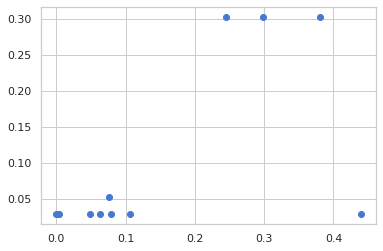

In [29]:
plt.scatter(y_test,tuned_pred)

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 0.07002062480310452
MSE: 0.015964531400591803
RMSE: 0.1263508266715806


In [32]:
x1 = (df1['Total Animals']).to_numpy()
y1 = (df1['Total Production']).to_numpy()

In [34]:
v=y[0]/x[0];
ini=0
for i in range(1,len(x)):
  v1=y[i]/x[i];
  if(v>v1):
    v=v1;
    ini=i;

m1=df1['State/Union Territory']
print(m1[i]);


West Bengal


In [35]:
print(y/x)

[0.00312667 0.00522499 0.00129124 0.00080766 0.00317022 0.02675183
 0.00119684 0.00289466 0.00489446 0.00969992 0.00622524 0.01705518
 0.00419606 0.00359086 0.00121223 0.003175   0.01418116 0.00098475
 0.00388068 0.00431468 0.00419232 0.00096288 0.00454726 0.00906181
 0.00158094 0.00495833 0.02343632 0.00436697 0.00340125 0.0045508
 0.00090278 0.00181953 0.00551789 0.00538557 0.00203519]


In [36]:
m2=y/x
print(type(m2))
mn=min(m2)
m3=[]
m4=df1["State/Union Territory"]
for i in range(0,len(m2)):
    if(m2[i]==mn):
      m3.append(i)
print(m3)
for i in m3:
  print(m4[i]);

<class 'numpy.ndarray'>
[3]
Assam
